In [1]:
#Importing all the necessary libraries

import torch
import torch.nn as nn
from torch.autograd import Variable
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import time
import math, time
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import plotly.io as pio
pio.renderers.default='notebook'
import gc


In [2]:
#Input the stocks price dataset
df=pd.read_csv('GOOGLE_STOCK_DATA.csv')

In [3]:
df

symbol                       date    close      high     low    open  \
0     GOOGL  2004-08-19 00:00:00+00:00  100.335  104.0600   95.96  100.01   
1     GOOGL  2004-08-20 00:00:00+00:00  108.310  109.0800  100.50  101.01   
2     GOOGL  2004-08-23 00:00:00+00:00  109.400  113.4800  109.05  110.76   
3     GOOGL  2004-08-24 00:00:00+00:00  104.870  111.6000  103.57  111.24   
4     GOOGL  2004-08-25 00:00:00+00:00  106.000  108.0000  103.88  104.76   
...     ...                        ...      ...       ...     ...     ...   
4845  GOOGL  2023-11-16 00:00:00+00:00  136.930  137.2199  134.32  135.19   
4846  GOOGL  2023-11-17 00:00:00+00:00  135.310  136.0600  133.65  136.00   
4847  GOOGL  2023-11-20 00:00:00+00:00  136.250  136.6600  133.62  133.69   
4848  GOOGL  2023-11-21 00:00:00+00:00  136.970  137.1800  135.96  136.29   
4849  GOOGL  2023-11-22 00:00:00+00:00  138.490  139.4200  137.47  137.47   

        volume    adjClose     adjHigh      adjLow     adjOpen   adjVolume  \
0     44659000    2.516142    2.609555    2.406428    2.507992  1780845677   
1     22834300    2.716134    2.735444    2.520280    2.533069   910552508   
2     18256100    2.743469    2.845785    2.734692    2.777574   727989806   
3     15247300    2.629868    2.798639    2.597268    2.789611   608009321   
4      9188600    2.658206    2.708360    2.605042    2.627110   366409426   
...        ...         ...         ...         ...         ...         ...   
4845  28013179  136.930000  137.219900  134.320000  135.190000    28013179   
4846  37287691  135.310000  136.060000  133.650000  136.000000    37287691   
4847  27850762  136.250000  136.660000  133.620000  133.690000    27850762   
4848  22635272  136.970000  137.180000  135.960000  136.290000    22635272   
4849  17820456  138.490000  139.420000  137.470000  137.470000    17820456   

      divCash  splitFactor  
0         0.0          1.0  
1         0.0          1.0  
2         0.0          1.0  
3         0.0          1.0  
4         0.0          1.0  
...       ...          ...  
4845      0.0          1.0  
4846      0.0          1.0  
4847      0.0          1.0  
4848      0.0          1.0  
4849      0.0          1.0  

[4850 rows x 14 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4850 entries, 0 to 4849
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       4850 non-null   object 
 1   date         4850 non-null   object 
 2   close        4850 non-null   float64
 3   high         4850 non-null   float64
 4   low          4850 non-null   float64
 5   open         4850 non-null   float64
 6   volume       4850 non-null   int64  
 7   adjClose     4850 non-null   float64
 8   adjHigh      4850 non-null   float64
 9   adjLow       4850 non-null   float64
 10  adjOpen      4850 non-null   float64
 11  adjVolume    4850 non-null   int64  
 12  divCash      4850 non-null   float64
 13  splitFactor  4850 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 530.6+ KB


## Cleaning the data

In [5]:
#removing timestamps from the date column
df['date'] = df['date'].str.split(' ').str[0]

In [6]:
df

symbol        date    close      high     low    open    volume  \
0     GOOGL  2004-08-19  100.335  104.0600   95.96  100.01  44659000   
1     GOOGL  2004-08-20  108.310  109.0800  100.50  101.01  22834300   
2     GOOGL  2004-08-23  109.400  113.4800  109.05  110.76  18256100   
3     GOOGL  2004-08-24  104.870  111.6000  103.57  111.24  15247300   
4     GOOGL  2004-08-25  106.000  108.0000  103.88  104.76   9188600   
...     ...         ...      ...       ...     ...     ...       ...   
4845  GOOGL  2023-11-16  136.930  137.2199  134.32  135.19  28013179   
4846  GOOGL  2023-11-17  135.310  136.0600  133.65  136.00  37287691   
4847  GOOGL  2023-11-20  136.250  136.6600  133.62  133.69  27850762   
4848  GOOGL  2023-11-21  136.970  137.1800  135.96  136.29  22635272   
4849  GOOGL  2023-11-22  138.490  139.4200  137.47  137.47  17820456   

        adjClose     adjHigh      adjLow     adjOpen   adjVolume  divCash  \
0       2.516142    2.609555    2.406428    2.507992  1780845677      0.0   
1       2.716134    2.735444    2.520280    2.533069   910552508      0.0   
2       2.743469    2.845785    2.734692    2.777574   727989806      0.0   
3       2.629868    2.798639    2.597268    2.789611   608009321      0.0   
4       2.658206    2.708360    2.605042    2.627110   366409426      0.0   
...          ...         ...         ...         ...         ...      ...   
4845  136.930000  137.219900  134.320000  135.190000    28013179      0.0   
4846  135.310000  136.060000  133.650000  136.000000    37287691      0.0   
4847  136.250000  136.660000  133.620000  133.690000    27850762      0.0   
4848  136.970000  137.180000  135.960000  136.290000    22635272      0.0   
4849  138.490000  139.420000  137.470000  137.470000    17820456      0.0   

      splitFactor  
0             1.0  
1             1.0  
2             1.0  
3             1.0  
4             1.0  
...           ...  
4845          1.0  
4846          1.0  
4847          1.0  
4848          1.0  
4849          1.0  

[4850 rows x 14 columns]

In [7]:
df = df.reset_index()[['date', 'adjClose']]
df_dates = df.iloc[:,0]
df['date'] = pd.to_datetime(df['date'])

In [8]:
df = df.set_index('date')

In [9]:
df

adjClose
date                  
2004-08-19    2.516142
2004-08-20    2.716134
2004-08-23    2.743469
2004-08-24    2.629868
2004-08-25    2.658206
...                ...
2023-11-16  136.930000
2023-11-17  135.310000
2023-11-20  136.250000
2023-11-21  136.970000
2023-11-22  138.490000

[4850 rows x 1 columns]

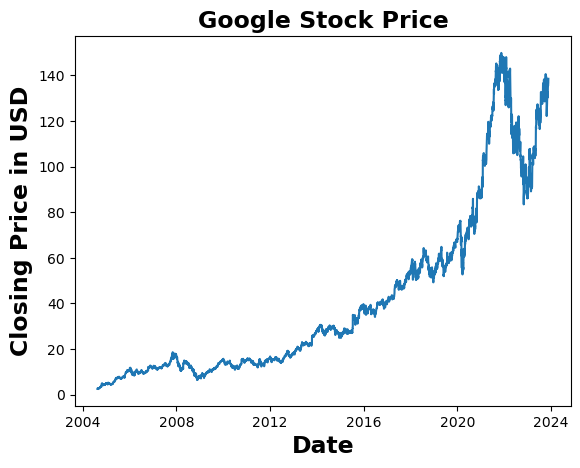

In [10]:

plt.plot(df[['adjClose']])
plt.title("Google Stock Price", fontsize=17, fontweight='bold')
plt.xlabel('Date', fontsize=17,fontweight='bold')
plt.ylabel('Closing Price in USD', fontsize=17,fontweight='bold')
plt.show()

In [11]:
#displaying an array of the original prices
df_prices = df['adjClose'].values.reshape(-1,1)

In [12]:
df_prices

array([[  2.51614209],
       [  2.71613445],
       [  2.74346883],
       ...,
       [136.25      ],
       [136.97      ],
       [138.49      ]])

In [13]:
#Seamless device selection to move between CPU and GPU based on availability


def get_default_device():
    """Picking a GPU if available, otherwise CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

def torch_data(data, device):
    """Move data to a device"""
    return to_device(torch.from_numpy(data).type(torch.Tensor), device)

In [14]:
device = get_default_device()
device

device(type='cpu')

In [15]:
# converting an array of values into sequences in accordance with window size
def create_seq_from_array(dataset, time_step):
	dataX, dataY = [], []
	for i in range(len(dataset) - time_step -1):
		a = dataset.iloc[i:(i + time_step)]
		dataX.append(a)
		dataY.append(dataset.iloc[i + time_step])
	return np.array(dataX), np.array(dataY)

In [16]:
# convert an array of values into a dataset matrix
def convert_array_to_dataset(dataset, time_step):

	#splitting our dataset into training, validation and testing
	train_size = round(len(dataset) * 0.80)
	remaining_size = len(dataset) - train_size
	val_size = round(0.50 * remaining_size)
	train_data, val_data, test_data = dataset.iloc[0:train_size, :], dataset.iloc[train_size:(train_size + val_size), :], dataset.iloc[(train_size + val_size):len(dataset), :]

	#scaling this data between 0 to 1
	scaler = MinMaxScaler(feature_range = (0, 1))
	train_data['adjClose'] = scaler.fit_transform(np.array(train_data['adjClose']).reshape(-1, 1))
	#making sure test data does not leak
	val_data['adjClose'] = scaler.transform(np.array(val_data['adjClose']).reshape(-1, 1))
	test_data['adjClose'] = scaler.transform(np.array(test_data['adjClose']).reshape(-1, 1))

	X_train, y_train = create_seq_from_array(train_data, time_step)
	X_val, y_val = create_seq_from_array(val_data, time_step)
	X_test, y_test = create_seq_from_array(test_data, time_step)

	# reshaping our input to be [samples, time steps, features] which is required for LSTM
	X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
	X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
	X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

	y_train = y_train.reshape(y_train.shape[0], 1)
	y_val = y_val.reshape(y_val.shape[0], 1)
	y_test = y_test.reshape(y_test.shape[0], 1)

	return X_train, X_val, X_test, y_train, y_val, y_test, scaler

In [17]:
# convert an array of values into a dataset matrix
def convert_array_to_dataset_test(dataset, time_step):

	##splitting dataset into train  test split
	train_size = round(len(dataset) * 0.90)
	train_data, test_data = dataset.iloc[0:train_size, :], dataset.iloc[train_size:, :]

	#scaling our data between 0 to 1
	scaler = MinMaxScaler(feature_range = (0, 1))
	train_data['adjClose'] = scaler.fit_transform(np.array(train_data['adjClose']).reshape(-1, 1))
	#Ensuring our test data does not leak into the others
	test_data['adjClose'] = scaler.transform(np.array(test_data['adjClose']).reshape(-1, 1))

	X_train, y_train = create_seq_from_array(train_data, time_step)
	X_test, y_test = create_seq_from_array(test_data, time_step)

	# reshape input to be [samples, time steps, features] which is required for LSTM
	X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
	X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

	y_train = y_train.reshape(y_train.shape[0], 1)
	y_test = y_test.reshape(y_test.shape[0], 1)

	return X_train, X_test, y_train, y_test, scaler

In [18]:
# Create a baseline default RNN Model
class RNN_base(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(RNN_base, self).__init__()

        # Number of hidden dimensions
        self.hidden_dim = hidden_dim

        # Number of hidden layers
        self.layer_dim = layer_dim

        # RNN
        self.rnn = nn.RNN(input_dim, hidden_dim, layer_dim, batch_first = True, nonlinearity = 'tanh')

        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):

        # Initializing any hidden state with zeros
        h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim, device=device))

        # Single time step
        out, hn = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

In [19]:
# this is the function to train the model
def fit(num_epochs, lr, model, loss_type, opt_func, X_train, y_train):
    optimiser = opt_func(model.parameters(), lr)
    hist = np.zeros(num_epochs)
    start_time = time.time()
    for t in range(num_epochs):
        y_train_pred = model(X_train)
        loss = loss_type(y_train_pred, y_train)
        #print("Epoch ", t, "MSE: ", loss.item())
        hist[t] = loss.item()

        # Reset gradients
        optimiser.zero_grad()

        # Compute gradients
        loss.backward()

        # Update parameters
        optimiser.step()

    training_time = time.time()-start_time
    print("Training time: {}".format(training_time))
    print()

    return hist, y_train_pred

In [20]:
# to plot the loss curve
def plot_loss(history):
    sns.set_style("darkgrid")
    fig = plt.figure(figsize=(8, 5))
    fig.subplots_adjust(hspace=0.2, wspace=0.2)
    ax = sns.lineplot(data = history, color='royalblue')
    ax.set_xlabel("Epoch", size = 14)
    ax.set_ylabel("Loss", size = 14)
    ax.set_title("Training Loss vs Epochs", size = 14, fontweight='bold')

In [21]:
# producing dynamic prediction plots
def plotly_predictions(results):

    fig = go.Figure()
    fig.add_trace(go.Scatter(go.Scatter(x=results['date'], y=results[0],
                        mode='lines',
                        name='Train prediction',
                        line = dict(color='#ff7f0e'))))
    fig.add_trace(go.Scatter(x=results['date'], y=results[1],
                        mode='lines',
                        name='Test prediction',
                        line = dict(color='#d62728')))
    fig.add_trace(go.Scatter(go.Scatter(x=results['date'], y=results[2],
                        opacity=0.6,
                        mode='lines',
                        name='Actual Value',
                        line = dict(color='#1f77b4'))))
    fig.update_layout(
        xaxis=dict(
            title_text='Dates',
            titlefont=dict(
                family='Rockwell',
                size=12,
                color='black',
            ),
            showline=True,
            showgrid=True,
            showticklabels=True,
            linecolor='black',
            linewidth=2,
            ticks='outside',
            tickfont=dict(
                family='Rockwell',
                size=12,
                color='black',
            ),
        ),
        yaxis=dict(
            title_text='Close (USD)',
            titlefont=dict(
                family='Rockwell',
                size=12,
                color='black',
            ),
            showline=True,
            showgrid=True,
            showticklabels=True,
            linecolor='black',
            linewidth=2,
            ticks='outside',
            tickfont=dict(
                family='Rockwell',
                size=12,
                color='black',
            ),
        ),
        showlegend=True,
        template = 'plotly_white'

    )

    annotations = []
    annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                                xanchor='left', yanchor='bottom',
                                text='Results',
                                font=dict(family='Rockwell',
                                            size=26,
                                            color='black'),
                                showarrow=False))
    fig.update_layout(annotations=annotations)

    fig.show()

In [22]:
#run function to evaluate the models in experiments
def evaluate_model_experiments(model, num_epochs, lr, loss_type, optimiser, time_step):

    X_train, X_val, X_test, y_train, y_val, y_test, scaler = convert_array_to_dataset(df, time_step)
    X_train = torch_data(X_train, device)
    X_val = torch_data(X_val, device)
    X_test = torch_data(X_test, device)
    y_train = torch_data(y_train, device)
    y_val = torch_data(y_val, device)
    y_test = torch_data(y_test, device)

    history, y_train_pred = fit(num_epochs, lr, model, loss_type, optimiser, X_train, y_train)

    gc.collect()
    torch.cuda.empty_cache()

    # make predictions
    y_val_pred = model(X_val)

    # invert predictions
    y_train_pred = scaler.inverse_transform(y_train_pred.cpu().detach().numpy())
    y_train = scaler.inverse_transform(y_train.cpu().detach().numpy())
    y_val_pred = scaler.inverse_transform(y_val_pred.cpu().detach().numpy())
    y_val = scaler.inverse_transform(y_val.cpu().detach().numpy())

    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(y_train, y_train_pred))
    print("===========================")
    print('Train Score: %.2f RMSE' % (trainScore))
    print("===========================")
    valScore = math.sqrt(mean_squared_error(y_val, y_val_pred))
    print('Validation Score: %.2f RMSE' % (valScore))
    print("===========================")

    end_of_time = len(y_train_pred) + len(y_val_pred) + (time_step * 2) + 1

    # shift train predictions for plotting
    trainPredictPlot = np.empty_like(df_prices[0 : end_of_time])
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[time_step : len(y_train_pred) + time_step, :] = y_train_pred

    # shift test predictions for plotting
    valPredictPlot = np.empty_like(df_prices[0 : end_of_time])
    valPredictPlot[:, :] = np.nan
    valPredictPlot[len(y_train_pred)  + (time_step * 2) + 1 : end_of_time, :] = y_val_pred

    original = df[0 : end_of_time]
    predictions = np.append(trainPredictPlot, valPredictPlot, axis=1)
    predictions = np.append(predictions, original, axis=1)
    result = pd.DataFrame(predictions)
    result = pd.concat([result, df_dates.iloc[0 : end_of_time]], axis = 1)

    #getting and appending the results to the results list
    metadata = [[time_step, model.layer_dim, model.hidden_dim, trainScore, valScore]]
    metadata = pd.DataFrame(metadata, columns=['time_step', 'num_layers', 'hidden_dim', 'trainScore', 'valScore'])

    return metadata

In [23]:
#run function to evaluate a single model
def evaluate_single_model(model, num_epochs, lr, loss_type, optimiser, time_step):

    X_train, X_val, X_test, y_train, y_val, y_test, scaler = convert_array_to_dataset(df, time_step)
    X_train = torch_data(X_train, device)
    X_val = torch_data(X_val, device)
    X_test = torch_data(X_test, device)
    y_train = torch_data(y_train, device)
    y_val = torch_data(y_val, device)
    y_test = torch_data(y_test, device)

    history, y_train_pred = fit(num_epochs, lr, model, loss_type, optimiser, X_train, y_train)

    gc.collect()
    torch.cuda.empty_cache()

    # make predictions
    y_val_pred = model(X_val)

    # invert predictions
    y_train_pred = scaler.inverse_transform(y_train_pred.cpu().detach().numpy())
    y_train = scaler.inverse_transform(y_train.cpu().detach().numpy())
    y_val_pred = scaler.inverse_transform(y_val_pred.cpu().detach().numpy())
    y_val = scaler.inverse_transform(y_val.cpu().detach().numpy())

    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(y_train, y_train_pred))
    print("===========================")
    print('Train Score: %.2f RMSE' % (trainScore))
    print("===========================")
    valScore = math.sqrt(mean_squared_error(y_val, y_val_pred))
    print('Validation Score: %.2f RMSE' % (valScore))
    print("===========================")

    end_of_time = len(y_train_pred) + len(y_val_pred) + (time_step * 2) + 1

    # shift train predictions for plotting
    trainPredictPlot = np.empty_like(df_prices[0 : end_of_time])
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[time_step : len(y_train_pred) + time_step, :] = y_train_pred

    # shift test predictions for plotting
    valPredictPlot = np.empty_like(df_prices[0 : end_of_time])
    valPredictPlot[:, :] = np.nan
    valPredictPlot[len(y_train_pred)  + (time_step * 2) + 1 : end_of_time, :] = y_val_pred


    original = df[0 : end_of_time]
    predictions = np.append(trainPredictPlot, valPredictPlot, axis=1)
    predictions = np.append(predictions, original, axis=1)
    result = pd.DataFrame(predictions)
    result = pd.concat([result, df_dates.iloc[0 : end_of_time]], axis = 1)
    plot_loss(history)
    plotly_predictions(result)
    return None

In [24]:
#run function to evaluate the final model
def test_final_model(model, num_epochs, lr, loss_type, optimiser, time_step):

    X_train, X_test, y_train, y_test, scaler = convert_array_to_dataset_test(df, time_step)
    X_train = torch_data(X_train, device)
    X_test = torch_data(X_test, device)
    y_train = torch_data(y_train, device)
    y_test = torch_data(y_test, device)

    history, y_train_pred = fit(num_epochs, lr, model, loss_type, optimiser, X_train, y_train)

    gc.collect()
    torch.cuda.empty_cache()

    # make predictions
    y_test_pred = model(X_test)

    # invert predictions
    y_train_pred = scaler.inverse_transform(y_train_pred.cpu().detach().numpy())
    y_train = scaler.inverse_transform(y_train.cpu().detach().numpy())
    y_test_pred = scaler.inverse_transform(y_test_pred.cpu().detach().numpy())
    y_test = scaler.inverse_transform(y_test.cpu().detach().numpy())

    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(y_train, y_train_pred))
    print("===========================")
    print('Train Score: %.2f RMSE' % (trainScore))
    print("===========================")
    testScore = math.sqrt(mean_squared_error(y_test, y_test_pred))
    print('Test Score: %.2f RMSE' % (testScore))
    print("===========================")

    end_of_time = len(y_train_pred) + len(y_test_pred) + (time_step * 2) + 1

    # shift train predictions for plotting
    trainPredictPlot = np.empty_like(df_prices[0 : end_of_time])
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[time_step : len(y_train_pred) + time_step, :] = y_train_pred

    # shift test predictions for plotting
    testPredictPlot = np.empty_like(df_prices[0 : end_of_time])
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(y_train_pred)  + (time_step * 2) + 1 : end_of_time, :] = y_test_pred


    original = df[0 : end_of_time]
    predictions = np.append(trainPredictPlot, testPredictPlot, axis=1)
    predictions = np.append(predictions, original, axis=1)
    result = pd.DataFrame(predictions)
    result = pd.concat([result, df_dates.iloc[0 : end_of_time]], axis = 1)
    plot_loss(history)
    plotly_predictions(result)
    return None

## Baseline RNN model

Training time: 0.2487812042236328

Train Score: 7.20 RMSE
Validation Score: 61.04 RMSE


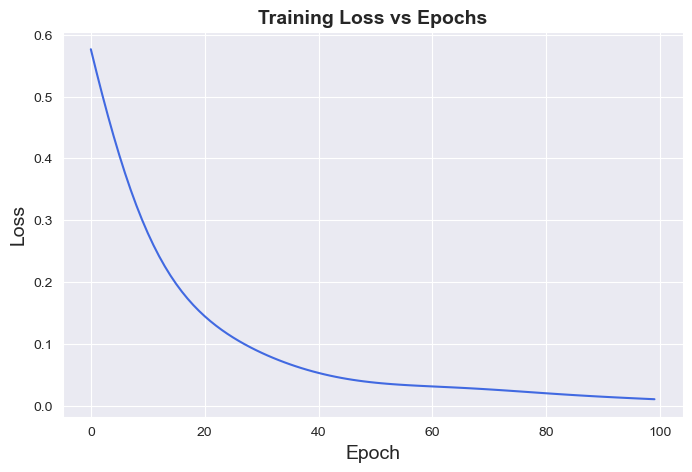

In [25]:
#parameters for Baseline default RNN
input_dim = 1
hidden_dim = 1
num_layers = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam
time_step = 20

#declaring the model
torch.manual_seed(69)
baseline_rnn = RNN_base(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = num_layers)
baseline_rnn = to_device(baseline_rnn, device)

#training and evaluating model
evaluate_single_model(baseline_rnn, num_epochs, lr, loss_type, optimiser, time_step)



# Experimenting with baseline RNN

## Using ReLU as the non-linearity function in RNN

In [26]:
# RNN model with relu as nonlinearity
class RNN_relu(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(RNN_relu, self).__init__()

        # Number of hidden dimensions
        self.hidden_dim = hidden_dim

        # Number of hidden layers
        self.layer_dim = layer_dim

        # RNN
        self.rnn = nn.RNN(input_dim, hidden_dim, layer_dim, batch_first = True, nonlinearity = 'relu')

        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):

        # Initialize hidden state with zeros
        h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim, device=device))

        # One time step
        out, hn = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

Training time: 0.282881498336792

Train Score: 17.24 RMSE
Validation Score: 60.73 RMSE


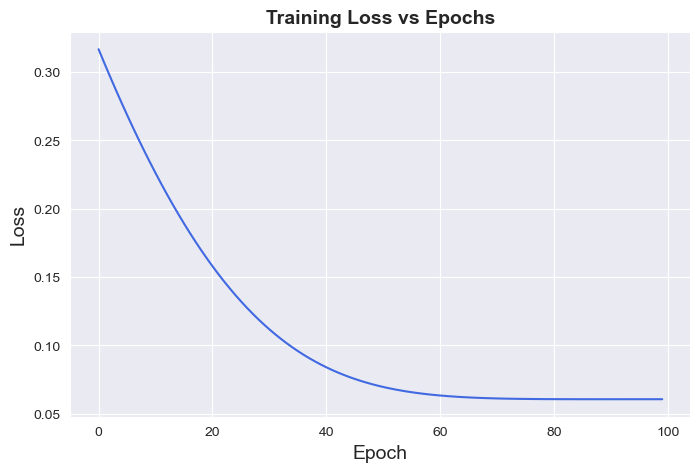

In [27]:
#parameters for RNN
input_dim = 1
hidden_dim = 1
num_layers = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam
time_step = 20

#declaring the model
torch.manual_seed(69)
relu_rnn = RNN_relu(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = num_layers)
relu_rnn = to_device(relu_rnn, device)

#training and evaluating model
evaluate_single_model(relu_rnn, num_epochs, lr, loss_type, optimiser, time_step)

## Hyperparameter Tuning with RNN

In [28]:
#constant parameters
input_dim = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction = 'mean')
optimiser = torch.optim.Adam

#lists of parameters for hyperparameter tuning
num_layers = [1, 2]
sliding_windows = [20, 30, 50, 100]
hidden_dims = [2, 4, 8, 16, 32]

tanh_results = []
relu_results = []
for time_step in sliding_windows:
    for hidden_dim in hidden_dims:
        for layers in num_layers:

            print("====================================================")
            print("Time Step =", time_step, "| Hidden States =", hidden_dim, "| Num Layers =", layers)
            print("====================================================")
            print()

            #declaring the tanh RNN model
            torch.manual_seed(69)
            tanh_rnn = RNN_base(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = layers)
            tanh_rnn = to_device(tanh_rnn, device)
            #training and evaluating model
            tanh_res = evaluate_model_experiments(tanh_rnn, num_epochs, lr, loss_type, optimiser, time_step)
            tanh_results += [tanh_res.iloc[0]]
            print()

            #declaring the ReLU RNN model
            torch.manual_seed(69)
            relu_rnn_exp = RNN_relu(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = layers)
            relu_rnn_exp = to_device(relu_rnn_exp, device)
            #training and evaluating model
            relu_res = evaluate_model_experiments(relu_rnn_exp, num_epochs, lr, loss_type, optimiser, time_step)
            relu_results += [relu_res.iloc[0]]
            print()

Time Step = 20 | Hidden States = 2 | Num Layers = 1

Training time: 0.5329985618591309

Train Score: 0.58 RMSE
Validation Score: 23.66 RMSE

Training time: 0.566225528717041

Train Score: 1.11 RMSE
Validation Score: 1.97 RMSE

Time Step = 20 | Hidden States = 2 | Num Layers = 2

Training time: 0.9329402446746826

Train Score: 0.75 RMSE
Validation Score: 33.92 RMSE

Training time: 0.9503984451293945

Train Score: 0.65 RMSE
Validation Score: 3.50 RMSE

Time Step = 20 | Hidden States = 4 | Num Layers = 1

Training time: 0.6575376987457275

Train Score: 1.29 RMSE
Validation Score: 29.25 RMSE

Training time: 0.7126889228820801

Train Score: 0.53 RMSE
Validation Score: 1.85 RMSE

Time Step = 20 | Hidden States = 4 | Num Layers = 2

Training time: 1.2219653129577637

Train Score: 1.25 RMSE
Validation Score: 36.90 RMSE

Training time: 1.2494287490844727

Train Score: 0.65 RMSE
Validation Score: 33.56 RMSE

Time Step = 20 | Hidden States = 8 | Num Layers = 1

Training time: 0.7911303043365479



Training time: 1.6302719116210938

Train Score: 0.59 RMSE
Validation Score: 14.54 RMSE

Training time: 1.7525534629821777

Train Score: 0.55 RMSE
Validation Score: 13.93 RMSE

Time Step = 30 | Hidden States = 16 | Num Layers = 2

Training time: 3.6313862800598145

Train Score: 0.83 RMSE
Validation Score: 28.95 RMSE

Training time: 3.6570937633514404

Train Score: 0.87 RMSE
Validation Score: 3.12 RMSE

Time Step = 30 | Hidden States = 32 | Num Layers = 1

Training time: 3.2748348712921143

Train Score: 0.65 RMSE
Validation Score: 16.43 RMSE

Training time: 3.3073318004608154

Train Score: 0.68 RMSE
Validation Score: 4.31 RMSE

Time Step = 30 | Hidden States = 32 | Num Layers = 2

Training time: 7.3371734619140625

Train Score: 0.66 RMSE
Validation Score: 22.54 RMSE

Training time: 7.242927312850952

Train Score: 0.73 RMSE
Validation Score: 2.88 RMSE

Time Step = 50 | Hidden States = 2 | Num Layers = 1

Training time: 1.1343295574188232

Train Score: 0.58 RMSE
Validation Score: 24.42 RMS

Training time: 3.3727054595947266

Train Score: 0.55 RMSE
Validation Score: 1.87 RMSE

Time Step = 100 | Hidden States = 4 | Num Layers = 2

Training time: 5.830731391906738

Train Score: 1.24 RMSE
Validation Score: 40.27 RMSE

Training time: 6.116284370422363

Train Score: 0.65 RMSE
Validation Score: 36.86 RMSE

Time Step = 100 | Hidden States = 8 | Num Layers = 1

Training time: 4.188162565231323

Train Score: 0.75 RMSE
Validation Score: 24.78 RMSE

Training time: 4.559518575668335

Train Score: 0.57 RMSE
Validation Score: 31.36 RMSE

Time Step = 100 | Hidden States = 8 | Num Layers = 2

Training time: 7.71155047416687

Train Score: 1.38 RMSE
Validation Score: 35.11 RMSE

Training time: 8.391141653060913

Train Score: 0.77 RMSE
Validation Score: 8.81 RMSE

Time Step = 100 | Hidden States = 16 | Num Layers = 1

Training time: 6.053955793380737

Train Score: 0.60 RMSE
Validation Score: 15.81 RMSE

Training time: 6.045275449752808

Train Score: 0.56 RMSE
Validation Score: 14.84 RMSE

Ti

In [29]:
tanh_results = pd.DataFrame(tanh_results, columns=['time_step', 'num_layers', 'hidden_dim', 'trainScore', 'valScore'], index = None)
relu_results = pd.DataFrame(relu_results, columns=['time_step', 'num_layers', 'hidden_dim', 'trainScore', 'valScore'], index = None)

In [30]:
tanh_results = tanh_results.sort_values('valScore', ascending=True, ignore_index = True)
tanh_results

time_step  num_layers  hidden_dim  trainScore   valScore
0        20.0         1.0        16.0    0.594177  14.390610
1        30.0         1.0        16.0    0.594776  14.539192
2        50.0         1.0        16.0    0.595902  14.871467
3       100.0         1.0        16.0    0.599551  15.812668
4        20.0         1.0        32.0    0.650786  16.223458
5        30.0         1.0        32.0    0.651748  16.431736
6        50.0         1.0        32.0    0.653125  16.799313
7       100.0         1.0        32.0    0.657299  17.834450
8        20.0         2.0        32.0    0.657376  22.255282
9        30.0         2.0        32.0    0.656863  22.544245
10       20.0         1.0         8.0    0.750970  22.585748
11       30.0         1.0         8.0    0.751119  22.824201
12       50.0         2.0        32.0    0.660255  23.063901
13       50.0         1.0         8.0    0.751025  23.333719
14       20.0         1.0         2.0    0.579922  23.664328
15       30.0         1.0         2.0    0.579943  23.908763
16       50.0         1.0         2.0    0.580150  24.422604
17      100.0         2.0        32.0    0.664916  24.501096
18      100.0         1.0         8.0    0.752156  24.779454
19      100.0         1.0         2.0    0.579444  25.891139
20       20.0         2.0        16.0    0.832509  28.654719
21       30.0         2.0        16.0    0.832236  28.949543
22       20.0         1.0         4.0    1.285190  29.249157
23       30.0         1.0         4.0    1.285274  29.556795
24       50.0         2.0        16.0    0.834377  29.613741
25       50.0         1.0         4.0    1.285374  30.225293
26      100.0         2.0        16.0    0.839045  31.479037
27       20.0         2.0         8.0    1.377975  31.889897
28      100.0         1.0         4.0    1.287431  32.077427
29       30.0         2.0         8.0    1.377726  32.242855
30       50.0         2.0         8.0    1.377155  33.004537
31       20.0         2.0         2.0    0.747304  33.920619
32       30.0         2.0         2.0    0.754695  34.338422
33      100.0         2.0         8.0    1.376670  35.114838
34       50.0         2.0         2.0    0.767501  35.219318
35       20.0         2.0         4.0    1.248519  36.896045
36       30.0         2.0         4.0    1.247883  37.260110
37      100.0         2.0         2.0    0.791621  37.635590
38       50.0         2.0         4.0    1.246249  38.053014
39      100.0         2.0         4.0    1.241263  40.268625

In [31]:
relu_results = relu_results.sort_values('valScore', ascending=True, ignore_index = True)
relu_results

time_step  num_layers  hidden_dim  trainScore   valScore
0        50.0         1.0         4.0    0.536260   1.790114
1        30.0         1.0         4.0    0.532798   1.844874
2        20.0         1.0         4.0    0.532208   1.853389
3       100.0         1.0         4.0    0.549098   1.872279
4        50.0         1.0         2.0    1.053319   1.888732
5       100.0         1.0         2.0    0.978808   1.961278
6        20.0         1.0         2.0    1.114023   1.968763
7        30.0         1.0         2.0    1.090095   1.969447
8        20.0         1.0        32.0    0.632210   2.218151
9        20.0         2.0        32.0    0.710033   2.775609
10       50.0         2.0        32.0    0.736641   2.781007
11       30.0         2.0        32.0    0.728604   2.876873
12      100.0         2.0        32.0    0.745934   2.914928
13       20.0         2.0        16.0    0.884103   3.102800
14       30.0         2.0        16.0    0.870922   3.123475
15       30.0         2.0         2.0    0.646445   3.470971
16       20.0         2.0         2.0    0.647274   3.496518
17       50.0         2.0        16.0    0.858517   3.568064
18       50.0         2.0         2.0    0.655295   3.609329
19      100.0         2.0         2.0    0.652096   3.633011
20       30.0         1.0        32.0    0.683677   4.305510
21       50.0         1.0        32.0    0.682995   4.334088
22      100.0         1.0        32.0    0.697017   4.383638
23      100.0         2.0        16.0    0.841842   4.873791
24       20.0         2.0         8.0    0.746896   7.700535
25       30.0         2.0         8.0    0.755320   8.345719
26       50.0         2.0         8.0    0.762865   8.543987
27      100.0         2.0         8.0    0.774424   8.812614
28       20.0         1.0        16.0    0.548489  13.812455
29       30.0         1.0        16.0    0.549058  13.931808
30       50.0         1.0        16.0    0.552453  14.195732
31      100.0         1.0        16.0    0.558953  14.840651
32       50.0         1.0         8.0    0.559226  28.460355
33       20.0         1.0         8.0    0.569948  28.521487
34       30.0         1.0         8.0    0.572755  28.881620
35      100.0         1.0         8.0    0.571823  31.361200
36       20.0         2.0         4.0    0.650187  33.557977
37       30.0         2.0         4.0    0.620923  33.749955
38       50.0         2.0         4.0    0.634949  34.452393
39      100.0         2.0         4.0    0.648968  36.855642

In [32]:
best_rnn_model = relu_results.iloc[0]
best_rnn_model

time_step     50.000000
num_layers     1.000000
hidden_dim     4.000000
trainScore     0.536260
valScore       1.790114
Name: 0, dtype: float64

Training time: 1.7027325630187988

Train Score: 0.54 RMSE
Validation Score: 1.79 RMSE


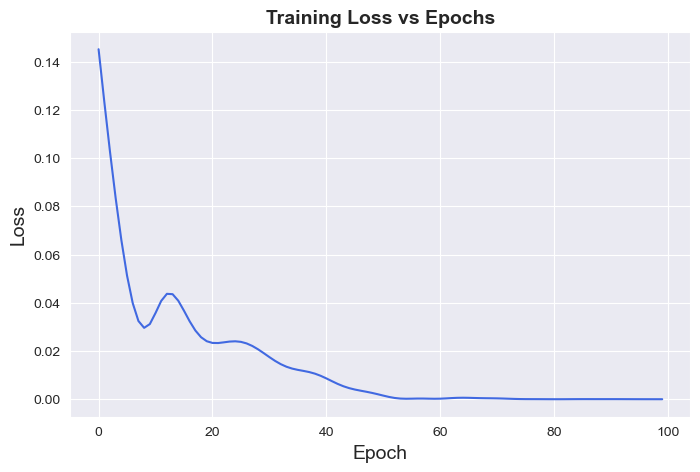

In [33]:
# Retraining our model with the tuned parameters

#constant parameters as used in a baseline RNN
input_dim = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam

#tuned hyperparameters
hidden_dim = int(best_rnn_model['hidden_dim'])
num_layers = int(best_rnn_model['num_layers'])
time_step = int(best_rnn_model['time_step'])

#declaring the model
torch.manual_seed(69)
tuned_rnn = RNN_relu(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = num_layers)
tuned_rnn = to_device(tuned_rnn, device)

#training and evaluating model
evaluate_single_model(tuned_rnn, num_epochs, lr, loss_type, optimiser, time_step)

# Long Short-Term Memory Model (LSTM)

In [34]:
class LSTM_model(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(LSTM_model, self).__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        self.lstm = nn.LSTM(input_dim, hidden_dim, layer_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim, device = device))
        c0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim, device = device))
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :])
        return out

In [35]:
gc.collect()
torch.cuda.empty_cache()

Training time: 7.302655458450317

Train Score: 0.90 RMSE
Validation Score: 34.98 RMSE


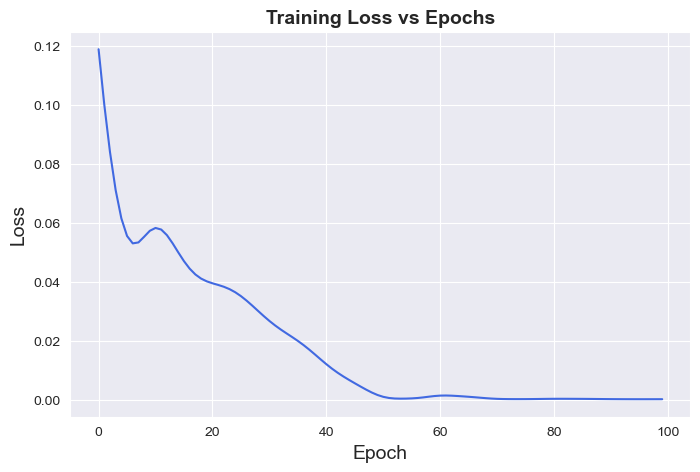

In [36]:
#parameters
input_dim = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction = 'mean')
optimiser = torch.optim.Adam

#tuned hyperparameters
hidden_dim = int(best_rnn_model['hidden_dim'])
num_layers = int(best_rnn_model['num_layers'])
time_step = int(best_rnn_model['time_step'])


#declaring the LSTM model
torch.manual_seed(69)
lstm_1 = LSTM_model(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = num_layers)
lstm_1 = to_device(lstm_1, device)

#training and evaluating model
evaluate_single_model(lstm_1, num_epochs, lr, loss_type, optimiser, time_step)

In [37]:
gc.collect()
torch.cuda.empty_cache()

## Hyperparameter Tuning with LSTM

In [38]:
#constant parameters
input_dim = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction = 'mean')
optimiser = torch.optim.Adam

#lists of parameters for hyperparameter tuning
num_layers = [1, 2]
sliding_windows = [20, 30, 50, 100]
hidden_dims = [2, 4, 8, 16, 32]

LSTM_results=[]

for time_step in sliding_windows:
    for hidden_dim in hidden_dims:
        for layers in num_layers:

            gc.collect()
            torch.cuda.empty_cache()

            print("====================================================")
            print("Time Step =", time_step, "| Hidden States =", hidden_dim, "| Num Layers =", layers)
            print("====================================================")
            print()

            #declaring the model
            torch.manual_seed(69)
            lstm_exp = LSTM_model(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = layers)
            lstm_exp = to_device(lstm_exp, device)

            #training and evaluating model
            LSTM_res = evaluate_model_experiments(lstm_exp, num_epochs, lr, loss_type, optimiser, time_step)
            LSTM_results += [LSTM_res.iloc[0]]
            print()

Time Step = 20 | Hidden States = 2 | Num Layers = 1

Training time: 1.708169937133789

Train Score: 15.72 RMSE
Validation Score: 73.86 RMSE

Time Step = 20 | Hidden States = 2 | Num Layers = 2

Training time: 3.2815120220184326

Train Score: 1.71 RMSE
Validation Score: 40.97 RMSE

Time Step = 20 | Hidden States = 4 | Num Layers = 1

Training time: 2.954900026321411

Train Score: 0.91 RMSE
Validation Score: 33.93 RMSE

Time Step = 20 | Hidden States = 4 | Num Layers = 2

Training time: 5.770177364349365

Train Score: 16.56 RMSE
Validation Score: 77.38 RMSE

Time Step = 20 | Hidden States = 8 | Num Layers = 1

Training time: 3.0286965370178223

Train Score: 1.34 RMSE
Validation Score: 32.69 RMSE

Time Step = 20 | Hidden States = 8 | Num Layers = 2

Training time: 5.806857585906982

Train Score: 1.62 RMSE
Validation Score: 40.73 RMSE

Time Step = 20 | Hidden States = 16 | Num Layers = 1

Training time: 3.0626940727233887

Train Score: 1.32 RMSE
Validation Score: 33.33 RMSE

Time Step = 20

Time Step = 50 | Hidden States = 8 | Num Layers = 2

Training time: 14.748364686965942

Train Score: 1.48 RMSE
Validation Score: 40.95 RMSE

Time Step = 50 | Hidden States = 16 | Num Layers = 1

Training time: 7.827637195587158

Train Score: 1.25 RMSE
Validation Score: 33.74 RMSE

Time Step = 50 | Hidden States = 16 | Num Layers = 2

Training time: 14.944371938705444

Train Score: 0.78 RMSE
Validation Score: 26.46 RMSE

Time Step = 50 | Hidden States = 32 | Num Layers = 1

Training time: 9.822832822799683

Train Score: 0.68 RMSE
Validation Score: 18.95 RMSE

Time Step = 50 | Hidden States = 32 | Num Layers = 2

Training time: 18.868001222610474

Train Score: 0.96 RMSE
Validation Score: 30.77 RMSE

Time Step = 100 | Hidden States = 2 | Num Layers = 1

Training time: 8.312392234802246

Train Score: 15.67 RMSE
Validation Score: 79.18 RMSE

Time Step = 100 | Hidden States = 2 | Num Layers = 2

Training time: 16.04003071784973

Train Score: 1.51 RMSE
Validation Score: 44.10 RMSE

Time Step 

In [39]:
LSTM_results = pd.DataFrame(LSTM_results, columns=['time_step', 'num_layers', 'hidden_dim', 'trainScore', 'valScore'], index = None)

In [40]:
LSTM_results = LSTM_results.sort_values('valScore', ascending=True, ignore_index = True)
LSTM_results

time_step  num_layers  hidden_dim  trainScore   valScore
0        30.0         1.0        32.0    0.676716  18.678555
1        50.0         1.0        32.0    0.677131  18.950260
2        20.0         1.0        32.0    0.685303  19.142549
3       100.0         1.0        32.0    0.679655  20.169036
4        50.0         2.0        16.0    0.778009  26.457212
5        30.0         2.0        16.0    0.782920  27.543653
6       100.0         2.0        16.0    0.766360  27.957921
7        20.0         2.0        16.0    0.837083  28.732304
8        30.0         2.0        32.0    0.959192  30.308270
9        20.0         2.0        32.0    0.972834  30.632801
10       50.0         2.0        32.0    0.959453  30.774998
11       20.0         1.0         8.0    1.338698  32.689873
12      100.0         2.0        32.0    0.964240  32.723382
13       30.0         1.0         8.0    1.354585  33.070653
14       30.0         1.0        16.0    1.281056  33.227138
15       20.0         1.0        16.0    1.316469  33.333910
16       50.0         1.0        16.0    1.252695  33.737156
17       50.0         1.0         8.0    1.352672  33.796438
18       20.0         1.0         4.0    0.909102  33.925344
19       30.0         1.0         4.0    0.903387  34.247876
20       50.0         1.0         4.0    0.895416  34.983948
21      100.0         1.0        16.0    1.223083  35.648325
22      100.0         1.0         8.0    1.338803  35.875560
23      100.0         1.0         4.0    0.876568  37.100093
24       30.0         2.0         8.0    1.526572  40.609058
25       20.0         2.0         8.0    1.623461  40.725904
26       50.0         2.0         8.0    1.484618  40.951319
27       20.0         2.0         2.0    1.709803  40.972985
28       30.0         2.0         2.0    1.594792  41.034228
29       50.0         2.0         2.0    1.553057  41.255772
30      100.0         2.0         8.0    1.616118  43.278176
31      100.0         2.0         2.0    1.508659  44.099209
32       20.0         1.0         2.0   15.722517  73.861248
33       30.0         1.0         2.0   15.715652  74.380702
34       50.0         1.0         2.0   15.700807  75.723828
35       20.0         2.0         4.0   16.562822  77.376385
36       30.0         2.0         4.0   16.561742  77.931166
37      100.0         1.0         2.0   15.668100  79.184260
38       50.0         2.0         4.0   16.550354  79.340091
39      100.0         2.0         4.0   16.524716  82.967826

In [41]:
best_lstm_model = LSTM_results.iloc[0]
best_lstm_model

time_step     30.000000
num_layers     1.000000
hidden_dim    32.000000
trainScore     0.676716
valScore      18.678555
Name: 0, dtype: float64

Training time: 5.712603569030762

Train Score: 0.68 RMSE
Validation Score: 18.68 RMSE


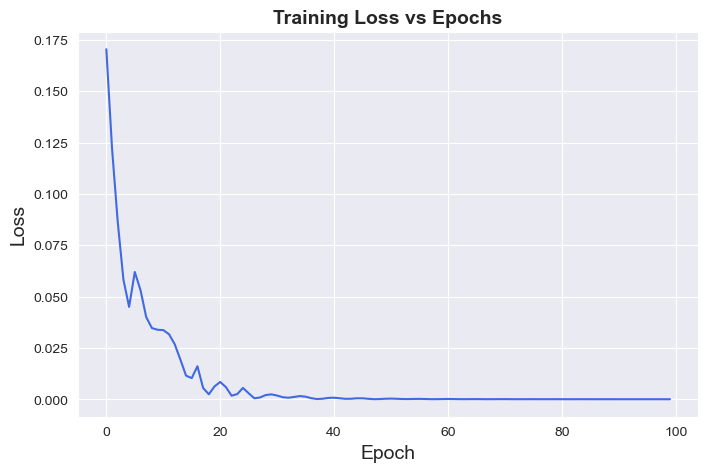

In [42]:
# Retraining our model with tuned parameters

#constant parameters as used in a baseline RNN
input_dim = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam

#tuned hyperparameters
hidden_dim = int(best_lstm_model['hidden_dim'])
num_layers = int(best_lstm_model['num_layers'])
time_step = int(best_lstm_model['time_step'])

#declaring the model
torch.manual_seed(69)
tuned_lstm = LSTM_model(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = num_layers)
tuned_lstm = to_device(tuned_lstm, device)

#training and evaluating model
evaluate_single_model(tuned_lstm, num_epochs, lr, loss_type, optimiser, time_step)

# Gated Recurrent Unit (GRU)

In [43]:
class GRU_model(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(GRU_model, self).__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        self.gru = nn.GRU(input_dim, hidden_dim, layer_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim, device = device))
        out, (hn) = self.gru(x, (h0.detach()))
        out = self.fc(out[:, -1, :])
        return out

In [44]:
gc.collect()
torch.cuda.empty_cache()

Training time: 10.676566362380981

Train Score: 0.52 RMSE
Validation Score: 8.66 RMSE


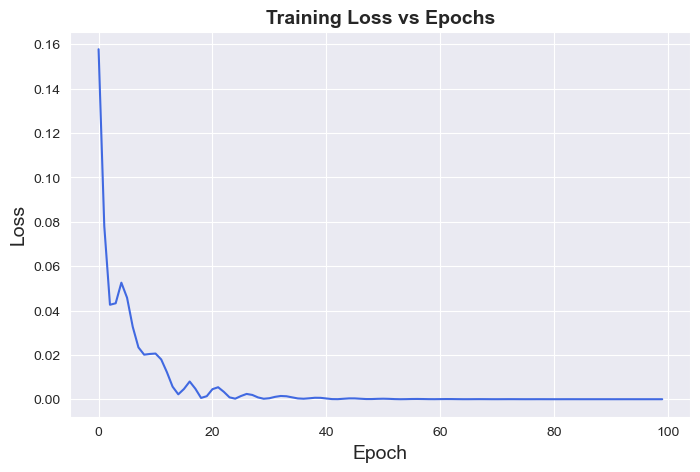

In [45]:
#parameters
input_dim = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction = 'mean')
optimiser = torch.optim.Adam

#tuned hyperparameters
hidden_dim = int(best_lstm_model['hidden_dim'])
num_layers = int(best_lstm_model['num_layers'])
time_step = int(best_lstm_model['time_step'])

#declaring the model
torch.manual_seed(69)
gru = GRU_model(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = num_layers)
gru = to_device(gru, device)

#training and evaluating model
evaluate_single_model(gru, num_epochs, lr, loss_type, optimiser, time_step)

In [46]:
gc.collect()
torch.cuda.empty_cache()

## Hyperparameter Tuning with GRU

In [47]:
#constant parameters
input_dim = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction = 'mean')
optimiser = torch.optim.Adam

#lists of parameters for hyperparameter tuning
num_layers = [1, 2]
sliding_windows = [20, 30, 50, 100]
hidden_dims = [2, 4, 8, 16, 32]

GRU_results=[]

for time_step in sliding_windows:
    for hidden_dim in hidden_dims:
        for layers in num_layers:

            gc.collect()
            torch.cuda.empty_cache()

            print("====================================================")
            print("Time Step =", time_step, "| Hidden States =", hidden_dim, "| Num Layers =", layers)
            print("====================================================")
            print()

            #declaring the model
            torch.manual_seed(69)
            gru_exp = GRU_model(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = layers)
            gru_exp = to_device(gru_exp, device)

            #training and evaluating model
            GRU_res = evaluate_model_experiments(gru_exp, num_epochs, lr, loss_type, optimiser, time_step)
            GRU_results += [GRU_res.iloc[0]]
            print()


Time Step = 20 | Hidden States = 2 | Num Layers = 1

Training time: 2.0868141651153564

Train Score: 5.34 RMSE
Validation Score: 48.37 RMSE

Time Step = 20 | Hidden States = 2 | Num Layers = 2

Training time: 4.252837419509888

Train Score: 3.20 RMSE
Validation Score: 47.06 RMSE

Time Step = 20 | Hidden States = 4 | Num Layers = 1

Training time: 3.0846633911132812

Train Score: 1.38 RMSE
Validation Score: 35.37 RMSE

Time Step = 20 | Hidden States = 4 | Num Layers = 2

Training time: 6.1805408000946045

Train Score: 1.30 RMSE
Validation Score: 40.53 RMSE

Time Step = 20 | Hidden States = 8 | Num Layers = 1

Training time: 4.181912899017334

Train Score: 0.68 RMSE
Validation Score: 18.54 RMSE

Time Step = 20 | Hidden States = 8 | Num Layers = 2

Training time: 7.930256366729736

Train Score: 1.60 RMSE
Validation Score: 37.08 RMSE

Time Step = 20 | Hidden States = 16 | Num Layers = 1

Training time: 4.339155197143555

Train Score: 0.60 RMSE
Validation Score: 16.01 RMSE

Time Step = 20 |

Time Step = 50 | Hidden States = 8 | Num Layers = 2

Training time: 20.40989065170288

Train Score: 1.56 RMSE
Validation Score: 38.24 RMSE

Time Step = 50 | Hidden States = 16 | Num Layers = 1

Training time: 10.962597370147705

Train Score: 0.61 RMSE
Validation Score: 16.30 RMSE

Time Step = 50 | Hidden States = 16 | Num Layers = 2

Training time: 22.983016967773438

Train Score: 0.76 RMSE
Validation Score: 24.64 RMSE

Time Step = 50 | Hidden States = 32 | Num Layers = 1

Training time: 17.53071165084839

Train Score: 0.52 RMSE
Validation Score: 8.84 RMSE

Time Step = 50 | Hidden States = 32 | Num Layers = 2

Training time: 36.595393896102905

Train Score: 0.51 RMSE
Validation Score: 16.15 RMSE

Time Step = 100 | Hidden States = 2 | Num Layers = 1

Training time: 11.031810998916626

Train Score: 5.76 RMSE
Validation Score: 53.13 RMSE

Time Step = 100 | Hidden States = 2 | Num Layers = 2

Training time: 20.957825183868408

Train Score: 2.98 RMSE
Validation Score: 50.73 RMSE

Time Step 

In [48]:
GRU_results = pd.DataFrame(GRU_results, columns=['time_step', 'num_layers', 'hidden_dim', 'trainScore', 'valScore'], index = None)

In [49]:
GRU_results = GRU_results.sort_values('valScore', ascending=True, ignore_index = True)
GRU_results

time_step  num_layers  hidden_dim  trainScore   valScore
0        20.0         1.0        32.0    0.516506   8.574317
1        30.0         1.0        32.0    0.516257   8.659871
2        50.0         1.0        32.0    0.517532   8.839123
3       100.0         1.0        32.0    0.521233   9.362236
4        20.0         2.0        32.0    0.513833  15.645409
5        30.0         2.0        32.0    0.507174  15.715228
6        20.0         1.0        16.0    0.602692  16.011721
7        50.0         2.0        32.0    0.508113  16.152527
8        50.0         1.0        16.0    0.607144  16.296376
9        30.0         1.0        16.0    0.611239  16.382913
10      100.0         2.0        32.0    0.514069  17.096106
11      100.0         1.0        16.0    0.617942  17.684297
12       30.0         1.0         8.0    0.673844  18.166550
13       50.0         1.0         8.0    0.665283  18.239184
14       20.0         1.0         8.0    0.684603  18.536554
15      100.0         1.0         8.0    0.668906  19.521594
16       20.0         2.0        16.0    0.770782  23.843087
17       30.0         2.0        16.0    0.758501  24.107675
18       50.0         2.0        16.0    0.758024  24.644185
19      100.0         2.0        16.0    0.757795  26.131839
20       20.0         1.0         4.0    1.376279  35.369668
21       50.0         1.0         4.0    1.323909  35.433184
22       30.0         1.0         4.0    1.364155  35.585124
23       20.0         2.0         8.0    1.595996  37.080746
24       30.0         2.0         8.0    1.578896  37.440847
25      100.0         1.0         4.0    1.306688  37.531030
26       50.0         2.0         8.0    1.564482  38.238495
27      100.0         2.0         8.0    1.539736  40.452241
28       20.0         2.0         4.0    1.298926  40.528277
29       30.0         2.0         4.0    1.295730  40.973490
30       50.0         2.0         4.0    1.295447  41.874104
31      100.0         2.0         4.0    1.286326  44.463939
32       20.0         2.0         2.0    3.204207  47.055424
33       30.0         2.0         2.0    3.258161  48.181253
34       50.0         2.0         2.0    3.108943  48.253172
35       20.0         1.0         2.0    5.336700  48.372855
36       30.0         1.0         2.0    5.388465  48.875310
37       50.0         1.0         2.0    5.498005  50.038798
38      100.0         2.0         2.0    2.984492  50.733148
39      100.0         1.0         2.0    5.758702  53.132316

In [50]:
best_gru_model = GRU_results.iloc[0]
best_gru_model

time_step     20.000000
num_layers     1.000000
hidden_dim    32.000000
trainScore     0.516506
valScore       8.574317
Name: 0, dtype: float64

Training time: 6.842542409896851

Train Score: 0.52 RMSE
Validation Score: 8.57 RMSE


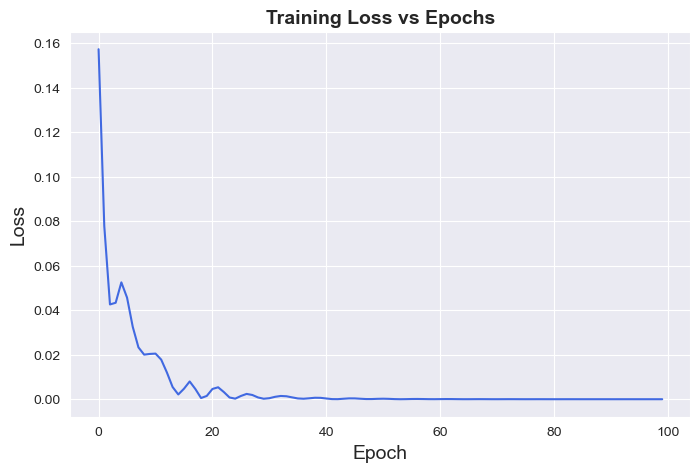

In [51]:
# Retraining our model with tuned parameters

#constant parameters as used in a baseline RNN
input_dim = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam

#tuned hyperparameters
hidden_dim = int(best_gru_model['hidden_dim'])
num_layers = int(best_gru_model['num_layers'])
time_step = int(best_gru_model['time_step'])

#declaring the model
torch.manual_seed(69)
tune_gru = GRU_model(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = num_layers)
tune_gru = to_device(tune_gru, device)

#training and evaluating model
evaluate_single_model(tune_gru, num_epochs, lr, loss_type, optimiser, time_step)

# Running and testing the Final Model

Training time: 1.9663443565368652

Train Score: 0.80 RMSE
Test Score: 2.74 RMSE


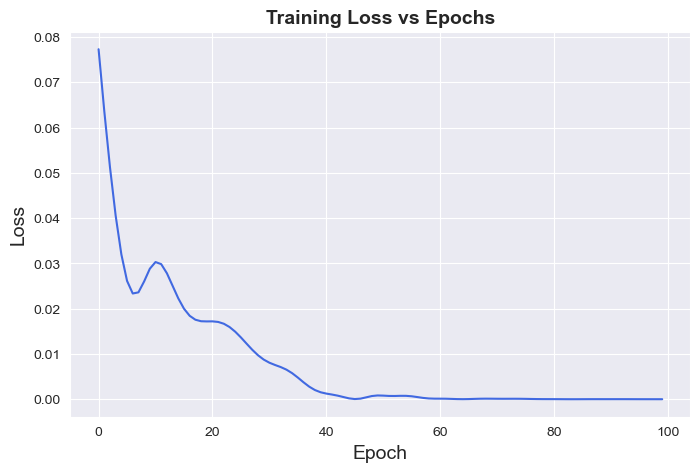

In [52]:
#parameters
input_dim = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction = 'mean')
optimiser = torch.optim.Adam

#tuned hyperparameters
hidden_dim = int(best_rnn_model['hidden_dim'])
num_layers = int(best_rnn_model['num_layers'])
time_step = int(best_rnn_model['time_step'])

#declaring the model
torch.manual_seed(69)
final_model = RNN_relu(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = num_layers)
final_model = to_device(final_model, device)

#training and testing the best model
test_final_model(final_model, num_epochs, lr, loss_type, optimiser, time_step)

### For Full graph display, please visit https://nbviewer.org/github/MritSriH/Deep-Learning/blob/main/RNN_STOCKS_PREDICTION.ipynb